In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['Hiragino Sans', 'MS Gothic']

play_info = pd.read_csv('play_info.csv', encoding='cp932', on_bad_lines='skip', engine='python')
print(play_info.shape)


(254361, 208)


/var/folders/33/_hgbk85d5f90ql149mhsrv0h0000gn/T/ipykernel_60052/942279438.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  zone_stats = pitch_data.groupby(['z_zone', 'x_zone']).agg({


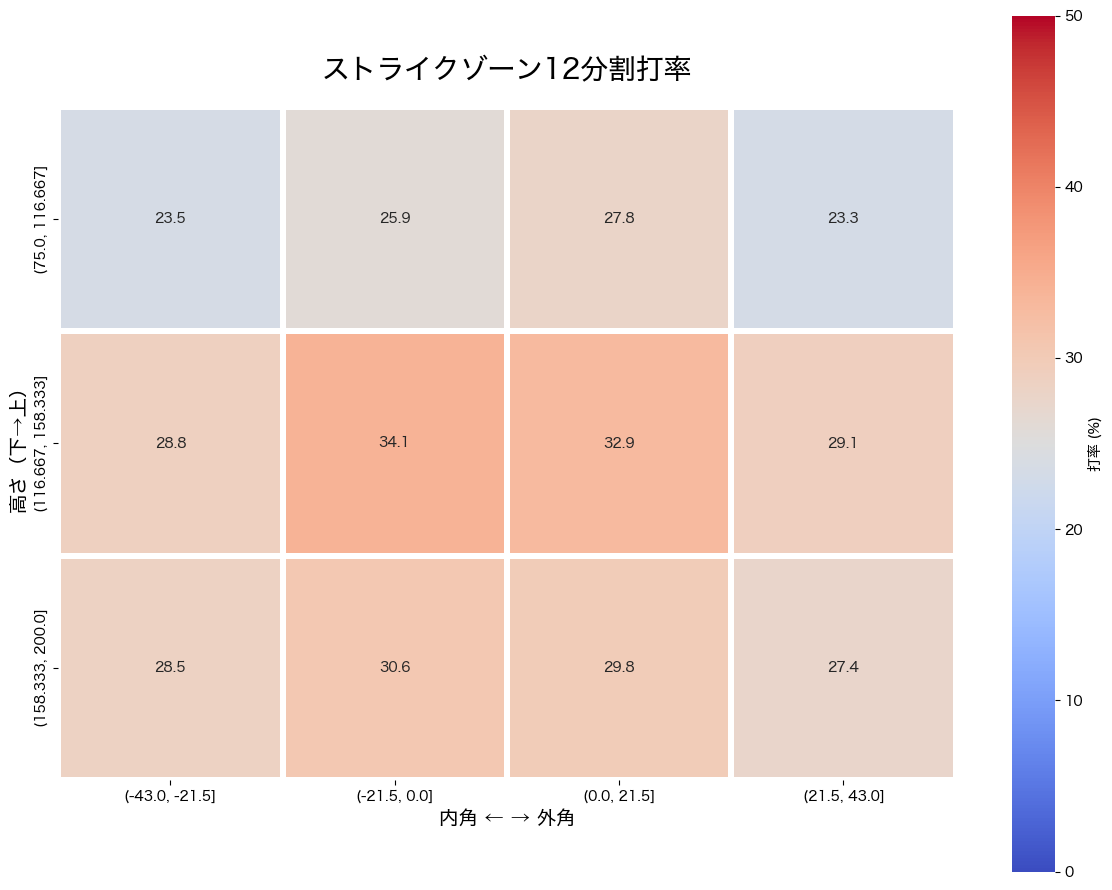


総打席数: 32989
総安打数: 9478
全体打率: 28.73%

各ゾーン別打率:
x_zone              (-43.0, -21.5]  (-21.5, 0.0]  (0.0, 21.5]  (21.5, 43.0]
z_zone                                                                     
(75.0, 116.667]          23.469388     25.880201    27.807727     23.345514
(116.667, 158.333]       28.790297     34.091658    32.897673     29.088235
(158.333, 200.0]         28.472727     30.616078    29.810901     27.365209


In [17]:
pitch_data = play_info[['pitch_location_x', 'pitch_location_y', 'pa_result']].dropna()

pitch_data = pitch_data[(pitch_data['pitch_location_x'].between(-60, 60)) & 
                        (pitch_data['pitch_location_y'].between(50, 250))]

pitch_data['is_hit'] = pitch_data['pa_result'].str.contains('安|２|３|本', na=False)

x_bins = np.linspace(-43, 43, 5)
z_bins = np.linspace(75, 200, 4)

pitch_data['x_zone'] = pd.cut(pitch_data['pitch_location_x'], bins=x_bins)
pitch_data['z_zone'] = pd.cut(pitch_data['pitch_location_y'], bins=z_bins)

zone_stats = pitch_data.groupby(['z_zone', 'x_zone']).agg({
    'is_hit': ['sum', 'count']
})
zone_stats.columns = ['安打', '打席']
zone_stats['打率'] = (zone_stats['安打'] / zone_stats['打席'] * 100).fillna(0)

heatmap_data = zone_stats['打率'].unstack(fill_value=0)

plt.figure(figsize=(12,9))
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='coolwarm',
            linewidths=3, linecolor='white', square=True,
            cbar_kws={'label': '打率 (%)'}, vmin=0, vmax=50)
plt.title('ストライクゾーン12分割打率', fontsize=20, pad=20)
plt.xlabel('内角 ← → 外角', fontsize=14)
plt.ylabel('高さ（下→上）', fontsize=14)
plt.tight_layout()
plt.show()

print(f"\n総打席数: {zone_stats['打席'].sum()}")
print(f"総安打数: {zone_stats['安打'].sum()}")
print(f"全体打率: {zone_stats['安打'].sum() / zone_stats['打席'].sum() * 100:.2f}%")
print(f"\n各ゾーン別打率:")
print(heatmap_data)


In [18]:
print("pitch_location_x 範圍:")
print(play_info['pitch_location_x'].describe())
print("\npitch_location_y 範圍:")
print(play_info['pitch_location_y'].describe())


pitch_location_x 範圍:
count    247381.000000
mean         -0.139744
std          47.462317
min        -151.000000
25%         -37.000000
50%           0.000000
75%          37.000000
max         151.000000
Name: pitch_location_x, dtype: float64

pitch_location_y 範圍:
count    247381.000000
mean        144.672356
std          66.357627
min         -32.000000
25%          97.000000
50%         144.000000
75%         194.000000
max         347.000000
Name: pitch_location_y, dtype: float64
